In [1]:
#|default_exp app

# Bearify

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

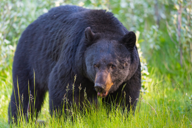

In [3]:
im = PILImage.create('Images/black.jpeg')
im.thumbnail((192,192))
im

In [4]:
#|export
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [5]:
#|export
learn = load_learner('bear_model.pkl')

In [11]:
#|export
pathlib.PosixPath = temp

In [7]:
learn.predict(im)

('black', tensor(0), tensor([9.9997e-01, 2.5549e-05, 4.9422e-07]))

In [8]:
#|export
categories = ('Black', 'Grizzly', 'Teddy')

def classify_image(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [9]:
classify_image(im)

{'Black': 0.9999740123748779,
 'Grizzly': 2.554871025495231e-05,
 'Teddy': 4.94215839808021e-07}

In [ ]:
#|export
image = gr.Image()
labels = gr.Label()
examples = ['Images/teddy.jpg', 'Images/grizzly.jpg', 'Images/black.jpeg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=labels, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Export

In [12]:
import nbdev
nbdev.export.nb_export('Bearify_nb.ipynb', 'app')
print('Export successful')

Export successful
